<img src="AUEB.png" /> <img src="MSc_BA.png" />

# Athens University of Economics and Business
# School of Business
# Department of Management Science & Technology
# Master of Science in Business Analytics
___

<table style='float:left;font-size: 20px;'>
    <tr>
        <th style='text-align: left;'>Program:</th>
        <td style='text-align: left;'>Full-Time</td>
    </tr>
    <tr>
        <th style='text-align: left;'>Quarter:</th>
        <td style='text-align: left;'>2nd (Winter Quarter)</td>
    </tr>
    <tr>
        <th style='text-align: left;'>Course:</th>
        <td style='text-align: left;'>Business and Privacy Issues in Data Analysis</td>
    </tr>
    <tr>
        <th style='text-align: left;'>Assignment:</th>
        <td style='text-align: left;'>Data Anonymization Exercise</td>
    </tr> 
    <tr>
        <th style='text-align: left;'>Students (Registration No):</th>
        <td style='text-align: left;'>Sakellaris Emmanouil (f2822215),
            Souflas Eleftherios-Efthymios (f2822217),
            Tsapatsaris Dimitrios (f2822218)</td>
    </tr>
</table>

In [1]:
# pip install pyspark
# pip install diffprivlib
# pip install matplotlib

# or if it produces error then run the following lines:

# import sys
# !{sys.executable} -m pip install pyspark
# !{sys.executable} -m pip install diffprivlib
# !{sys.executable} -m pip install matplotlib

from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("anonymization").getOrCreate()
file = "de.2010.pums.01.txt" 
pums_data = spark.read.option("multiline","true").text(file)
pums_data.createOrReplaceTempView("pums_data")

spark.sql("SELECT value FROM pums_data WHERE SUBSTR(value,1,1)='P'").createOrReplaceTempView("person_data")
# spark.sql("SELECT value FROM pums_data WHERE SUBSTR(value,1,1)='H'").createOrReplaceTempView("housing_data")

spark.sql("SELECT * FROM person_data").show()
# spark.sql("SELECT * FROM housing_data").show()

+--------------------+
|               value|
+--------------------+
|P0000003010101700...|
|P0000004010100100...|
|P0000004020100300...|
|P0000004030100300...|
|P0000004040100301...|
|P0000004050100301...|
|P0000005010100100...|
|P0000006010100100...|
|P0000008010100100...|
|P0000009010100100...|
|P0000009020100600...|
|P0000009030101400...|
|P0000011010100100...|
|P0000011020100300...|
|P0000011030100300...|
|P0000011040100301...|
|P0000011050100301...|
|P0000012010101600...|
|P0000013010100100...|
|P0000013020100200...|
+--------------------+
only showing top 20 rows



In [2]:
spark.sql("SELECT SUBSTR(value,1,1) as RECTYPE, SUBSTR(value,2,7) as SERIALNO, SUBSTR(value,9,2) as PNUM, " \
          "SUBSTR(value,11,1) as PSUB, SUBSTR(value,12,2) as PWEIGHT, SUBSTR(value,14,2) as RELATE, " \
          "SUBSTR(value,16,1) as RELATEA, SUBSTR(value,17,1) as OC, SUBSTR(value,18,1) as RC, " \
          "SUBSTR(value,19,1) as SEX, SUBSTR(value,20,1) as SEXA, SUBSTR(value,21,1) as SSPA, " \
          "SUBSTR(value,22,2) as AGE, SUBSTR(value,24,1) as AGEA, SUBSTR(value,25,1) as QTRBIR, " \
          "SUBSTR(value,26,2) as HISPAN, SUBSTR(value,28,1) as HISPANA, SUBSTR(value,29,1) as NUMRACE, " \
          "SUBSTR(value,30,1) as WHITE, SUBSTR(value,31,1) as BLACK, SUBSTR(value,32,1) as AIAN, " \
          "SUBSTR(value,33,1) as ASIAN, SUBSTR(value,34,1) as NHAW, SUBSTR(value,35,1) as OPI, " \
          "SUBSTR(value,36,1) as OTHER, SUBSTR(value,37,2) as RACESHORT, SUBSTR(value,39,2) as RACEDET, " \
          "SUBSTR(value,41,3) as RACECHKBX, SUBSTR(value,44,1) as RACEA, SUBSTR(value,45,1) as GQTYP, " \
          "SUBSTR(value,46,1) as GQTYPA, SUBSTR(value,47,28) as PADDING " \
          "FROM person_data").createOrReplaceTempView("person_data_sep")

# spark.sql("SELECT SUBSTR(value,1,1) as RECTYPE, SUBSTR(value,2,7) as SERIALNO, SUBSTR(value,9,2) as STATE, " \
#           "SUBSTR(value,11,1) as REGION, SUBSTR(value,12,1) as DIVISION, SUBSTR(value,13,5) as PUMA, " \
#           "SUBSTR(value,18,14) as TOTAREA, SUBSTR(value,32,14) as LANDAREA, SUBSTR(value,46,2) as SUBSAMPL, " \
#           "SUBSTR(value,48,2) as HWEIGHT, SUBSTR(value,50,2) as PERSONS, SUBSTR(value,52,1) as UNITTYPE, " \
#           "SUBSTR(value,53,1) as HSUBFLG, SUBSTR(value,54,1) as VACS, SUBSTR(value,55,1) as VACSA, " \
#           "SUBSTR(value,56,1) as TENURE, SUBSTR(value,57,1) as TENUREA, SUBSTR(value,58,1) as HHT, " \
#           "SUBSTR(value,59,2) as P60, SUBSTR(value,61,2) as P65, SUBSTR(value,63,2) as P18, " \
#           "SUBSTR(value,65,2) as NPF, SUBSTR(value,67,2) as NOCH, SUBSTR(value,69,2) as NRCH, " \
#           "SUBSTR(value,71,1) as PAOC, SUBSTR(value,72,1) as PARC, SUBSTR(value,73,1) as UPART, " \
#           "SUBSTR(value,74,1) as MULTG FROM housing_data").createOrReplaceTempView("housing_data_sep")

# print(spark.sql("SELECT * FROM housing_data_sep").toPandas().head(10))
spark.sql("SELECT * FROM person_data_sep").cache
spark.sql("SELECT * FROM person_data_sep").toPandas().head(10)

,RECTYPE,SERIALNO,PNUM,PSUB,PWEIGHT,RELATE,RELATEA,OC,RC,SEX,...,NHAW,OPI,OTHER,RACESHORT,RACEDET,RACECHKBX,RACEA,GQTYP,GQTYPA,PADDING
0,P,0000003,01,0,10,17,0,0,0,1,...,0,0,0,01,01,001,0,2,0,
1,P,0000004,01,0,10,01,0,0,0,2,...,0,0,0,02,02,002,0,0,0,
2,P,0000004,02,0,10,03,0,0,0,2,...,0,0,0,02,02,002,0,0,0,
3,P,0000004,03,0,10,03,0,0,0,1,...,0,0,0,02,02,002,0,0,0,
4,P,0000004,04,0,10,03,0,1,1,2,...,0,0,0,02,02,002,0,0,0,
5,P,0000004,05,0,10,03,0,1,1,1,...,0,0,0,02,02,002,0,0,0,
6,P,0000005,01,0,10,01,0,0,0,1,...,0,0,0,01,01,001,0,0,0,
7,P,0000006,01,0,10,01,0,0,0,1,...,0,0,0,01,01,001,0,0,0,
8,P,0000008,01,0,10,01,0,0,0,1,...,0,0,0,01,01,001,0,0,0,
9,P,0000009,01,0,10,01,0,0,0,2,...,0,0,0,02,02,002,0,0,0,


[Delaware Maps](https://www2.census.gov/geo/maps/dc10map/PUMA_RefMap/st10_de/)

In [3]:
spark.sql("SELECT COUNT(*) AS NUM_ROWS FROM person_data_sep").show()

spark.sql("SELECT * FROM person_data_sep").printSchema()

+--------+
|NUM_ROWS|
+--------+
|   89924|
+--------+

root
 |-- RECTYPE: string (nullable = true)
 |-- SERIALNO: string (nullable = true)
 |-- PNUM: string (nullable = true)
 |-- PSUB: string (nullable = true)
 |-- PWEIGHT: string (nullable = true)
 |-- RELATE: string (nullable = true)
 |-- RELATEA: string (nullable = true)
 |-- OC: string (nullable = true)
 |-- RC: string (nullable = true)
 |-- SEX: string (nullable = true)
 |-- SEXA: string (nullable = true)
 |-- SSPA: string (nullable = true)
 |-- AGE: string (nullable = true)
 |-- AGEA: string (nullable = true)
 |-- QTRBIR: string (nullable = true)
 |-- HISPAN: string (nullable = true)
 |-- HISPANA: string (nullable = true)
 |-- NUMRACE: string (nullable = true)
 |-- WHITE: string (nullable = true)
 |-- BLACK: string (nullable = true)
 |-- AIAN: string (nullable = true)
 |-- ASIAN: string (nullable = true)
 |-- NHAW: string (nullable = true)
 |-- OPI: string (nullable = true)
 |-- OTHER: string (nullable = true)
 |-- RACESHORT: s

PSUB, PWEIGHT, RELATEA, OC, RC, SEXA, SSPA, AGE, AGEA, QTRBIR, HISPANA, NUMRACE, WHITE, BLACK, AIAN, ASIAN, NHAW, OPI, OTHER, RACEA, GQTYPA

In [4]:
spark.sql("SELECT RECTYPE,SERIALNO,PNUM,INT(PSUB),INT(PWEIGHT),RELATE,INT(RELATEA),INT(OC),INT(RC),SEX,INT(SEXA),INT(SSPA), \
          INT(AGE),INT(AGEA),INT(QTRBIR),HISPAN,INT(HISPANA),INT(NUMRACE),INT(WHITE),INT(BLACK),INT(AIAN),INT(ASIAN), \
          INT(NHAW),INT(OPI),INT(OTHER),RACESHORT,RACEDET,RACECHKBX,INT(RACEA),GQTYP,INT(GQTYPA),PADDING \
          FROM person_data_sep").toPandas().head()

,RECTYPE,SERIALNO,PNUM,PSUB,PWEIGHT,RELATE,RELATEA,OC,RC,SEX,...,NHAW,OPI,OTHER,RACESHORT,RACEDET,RACECHKBX,RACEA,GQTYP,GQTYPA,PADDING
0,P,0000003,01,0,10,17,0,0,0,1,...,0,0,0,01,01,001,0,2,0,
1,P,0000004,01,0,10,01,0,0,0,2,...,0,0,0,02,02,002,0,0,0,
2,P,0000004,02,0,10,03,0,0,0,2,...,0,0,0,02,02,002,0,0,0,
3,P,0000004,03,0,10,03,0,0,0,1,...,0,0,0,02,02,002,0,0,0,
4,P,0000004,04,0,10,03,0,1,1,2,...,0,0,0,02,02,002,0,0,0,


In [5]:
# spark.sql("SELECT RECTYPE,SERIALNO,PNUM,INT(PSUB),INT(PWEIGHT),RELATE,INT(RELATEA),INT(OC),INT(RC),SEX,INT(SEXA),INT(SSPA), \
#           INT(AGE),INT(AGEA),INT(QTRBIR),HISPAN,INT(HISPANA),INT(NUMRACE),INT(WHITE),INT(BLACK),INT(AIAN),INT(ASIAN), \
#           INT(NHAW),INT(OPI),INT(OTHER),RACESHORT,RACEDET,RACECHKBX,INT(RACEA),GQTYP,INT(GQTYPA),PADDING \
#           FROM person_data_sep").toPandas().to_csv('person_data.csv')

spark.sql("SELECT SERIALNO,RELATE,INT(OC),INT(RC),SEX,INT(SSPA),INT(AGE),INT(QTRBIR),HISPAN,RACEDET,GQTYP \
          FROM person_data_sep").toPandas().to_csv('person_data_quasi.csv')

In [6]:
file = "k_anonymized.csv" 
k_anonymized = spark.read.option("header","true").csv(file)
k_anonymized.createOrReplaceTempView("k_anonymized")

spark.sql("SELECT * FROM k_anonymized").cache()

df = spark.sql("SELECT CASE  WHEN AGE='0-6'THEN 0 \
                        WHEN AGE='6-12' THEN 1 \
                        WHEN AGE='12-18' THEN 2 \
                        WHEN AGE='18-30' THEN 3 \
                        WHEN AGE='30-45' THEN 4 \
                        WHEN AGE='45-65' THEN 5 \
                        WHEN AGE='65-75' THEN 6 \
                        WHEN AGE='75-85' THEN 7 \
                        WHEN AGE='85-99' THEN 8 \
                        END AS AGE FROM k_anonymized").toPandas()

In [7]:
spark.sql("SELECT * FROM k_anonymized").toPandas()

,SERIALNO,OC,RC,SEX,AGE
0,Sussex,0,0,1,75-85
1,West_Central_New_Castle,0,0,1,18-30
2,Kent,0,0,2,18-30
3,Sussex,0,0,1,75-85
4,Sussex,0,0,2,45-65
...,...,...,...,...,...
89919,Sussex,1,1,1,0-6
89920,Kent,0,0,2,18-30
89921,South_New_Castle,0,0,2,18-30
89922,Kent,0,0,2,45-65


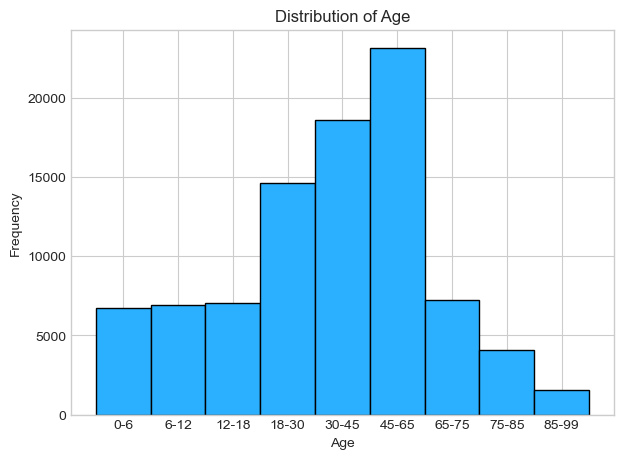

In [8]:
import numpy as np
import matplotlib.pyplot as plt

x = df.AGE
d = min(np.diff(np.unique(x)))
left_of_first_bin = min(x) - float(d)/2
right_of_last_bin = max(x) + float(d)/2
plt.figure(figsize=(7,5))
plt.style.use('seaborn-whitegrid')
plt.hist(x, np.arange(left_of_first_bin, right_of_last_bin + d, d), color = "#2ab0ff", ec = "black")
plt.xticks([0,1,2,3,4,5,6,7,8], ['0-6','6-12','12-18','18-30','30-45','45-65','65-75','75-85','85-99'])
plt.title('Distribution of Age') 
plt.xlabel('Age') 
plt.ylabel('Frequency')
plt.show()

<u>Differential Privacy</u> Geometric Noise mechanism (discrete case)

In [9]:
df = spark.sql("SELECT INT(AGE), INT(QTRBIR) FROM person_data_sep").toPandas()

[Differential Privacy and the 2020 US Census: The Redistricting File Decision and Release](https://mit-serc.pubpub.org/pub/differential-privacy-2020-us-census/release/1)

In [10]:
from diffprivlib.mechanisms import GaussianDiscrete

# When delta is negligible or equal to zero we apply e-differential private mechanism
mech = GaussianDiscrete(epsilon=17.14, delta=0.00001, sensitivity=1, random_state=0)

new_age = [mech.randomise(x) for x in df.AGE]
new_birth_quarter = [mech.randomise(x) for x in df.QTRBIR]

In [11]:
maxAge = max(df.AGE)
maxQB = max(df.QTRBIR)
minx = min(new_age)
maxx = max(new_age)
minz = min(new_birth_quarter)
maxz = max(new_birth_quarter)
for i in range(len(df)):
    new_age[i] = round((new_age[i] - minx) / (maxx - minx) * maxAge)
    new_birth_quarter[i] = round((new_birth_quarter[i] - minz) / (maxz - minz) * maxQB)

In [12]:
print("The differentially private mean age is", round(np.mean(new_age),1), "\t\t\t whereas the original was", 
      round(np.mean(df.AGE),1))
print("The differentially private mean quarter of birth is", round(np.mean(new_birth_quarter),1), 
      "\t whereas the original was", round(np.mean(df.QTRBIR),1))

The differentially private mean age is 38.9 			 whereas the original was 38.3
The differentially private mean quarter of birth is 1.5 	 whereas the original was 1.5


In [13]:
def apply_gaussian_discrete_on_age_and_birth_quarter(epsilon):
    mech = GaussianDiscrete(epsilon=epsilon, delta=0.00001, sensitivity=1, random_state=0)

    new_age = [mech.randomise(x) for x in df.AGE]
    new_birth_quarter = [mech.randomise(x) for x in df.QTRBIR]
    maxAge = max(df.AGE)
    maxQB = max(df.QTRBIR)
    minx = min(new_age)
    maxx = max(new_age)
    minz = min(new_birth_quarter)
    maxz = max(new_birth_quarter)
    for i in range(len(df)):
        new_age[i] = round((new_age[i] - minx) / (maxx - minx) * maxAge)
        new_birth_quarter[i] = round((new_birth_quarter[i] - minz) / (maxz - minz) * maxQB)
    return new_age, new_birth_quarter

def print_diff_priv_avg(new_age, new_birth_quarter):
    print("The differentially private mean age is", round(np.mean(new_age),1), "\t\t\t whereas the original was", 
          round(np.mean(df.AGE),1))
    print("The differentially private mean quarter of birth is", round(np.mean(new_birth_quarter),1), 
          "\t whereas the original was", round(np.mean(df.QTRBIR),1))

In [14]:
def plot_age(x):
    plt.figure(figsize=(14,7))
    plt.style.use('seaborn-whitegrid')
    n, bins, patches = plt.hist(x, bins=[0, 6, 12, 18, 30, 45, 65, 75, 85, 99], facecolor = '#2ab0ff', edgecolor='black', 
                                linewidth=0.5)
    plt.xticks(bins)
    plt.title('Distribution of Age') 
    plt.xlabel('Age') 
    plt.ylabel('Frequency') 
    plt.show()
    
def plot_birth_quarter(x):
    d = min(np.diff(np.unique(x)))
    left_of_first_bin = min(x) - float(d)/2
    right_of_last_bin = max(x) + float(d)/2
    plt.figure(figsize=(7,5))
    plt.style.use('seaborn-whitegrid')
    plt.hist(x, np.arange(left_of_first_bin, right_of_last_bin + d, d), color = "green", ec = "black")
    plt.xticks([0,1,2,3], ['Jan-Mar', 'Apr-Jun', 'Jul-Sep', 'Oct-Dec'])
    plt.title('Distribution of Quarter of Birth') 
    plt.xlabel('Quarter of Birth') 
    plt.ylabel('Frequency')
    plt.show()

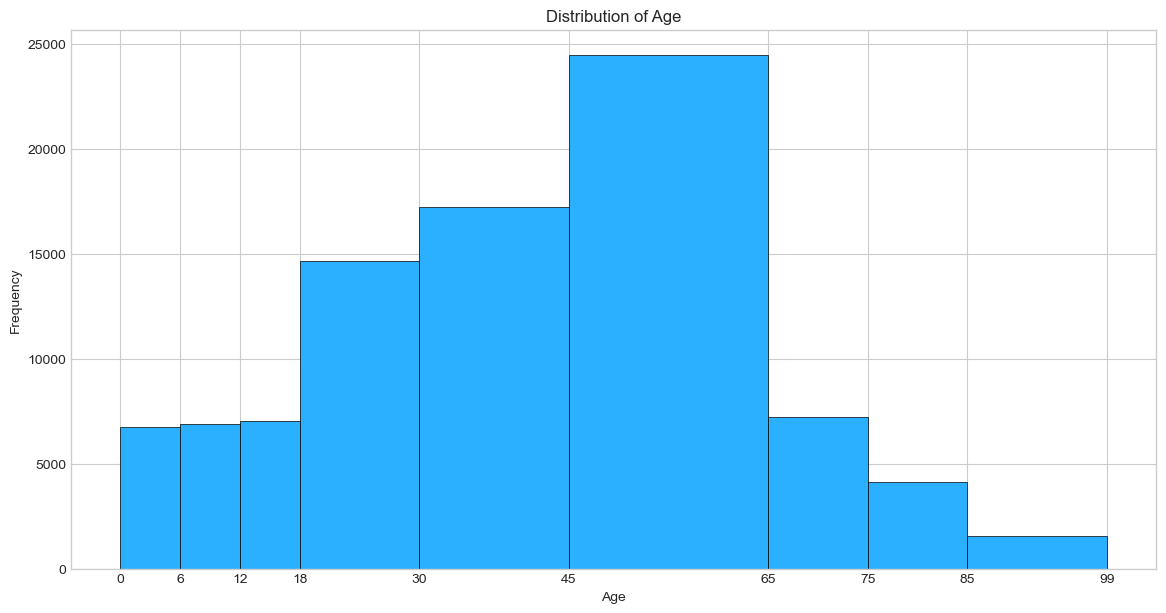

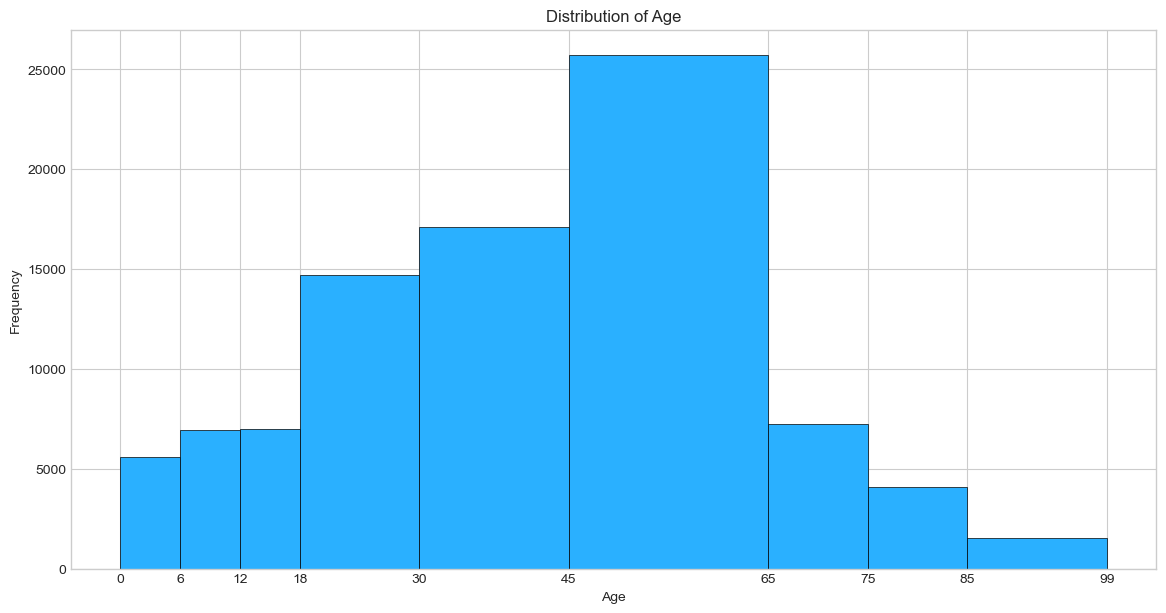

In [15]:
x = df.AGE
plot_age(x)
x = new_age
plot_age(x)

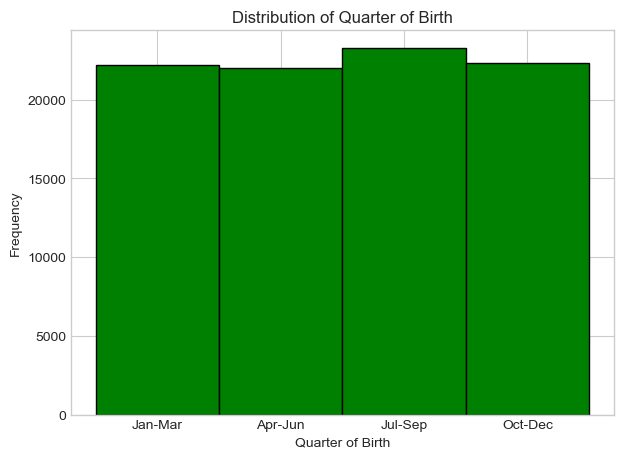

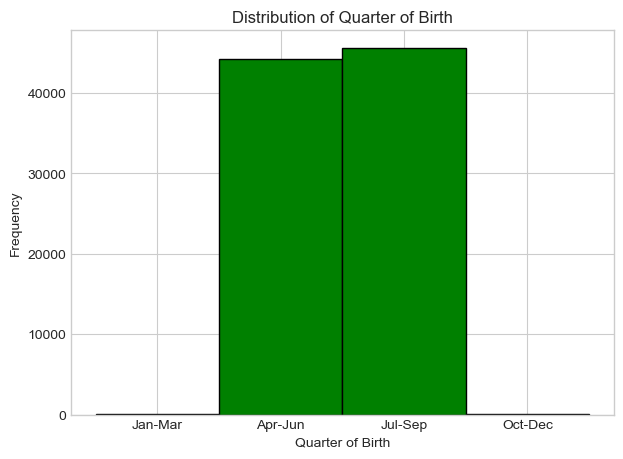

In [16]:
z = df.QTRBIR
plot_birth_quarter(z)
z = new_birth_quarter
plot_birth_quarter(z)

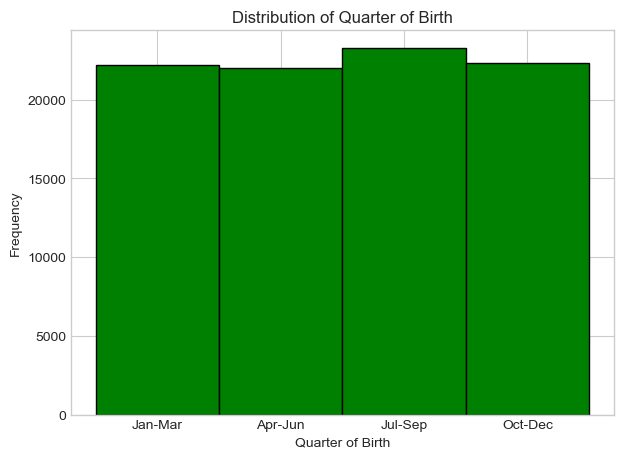

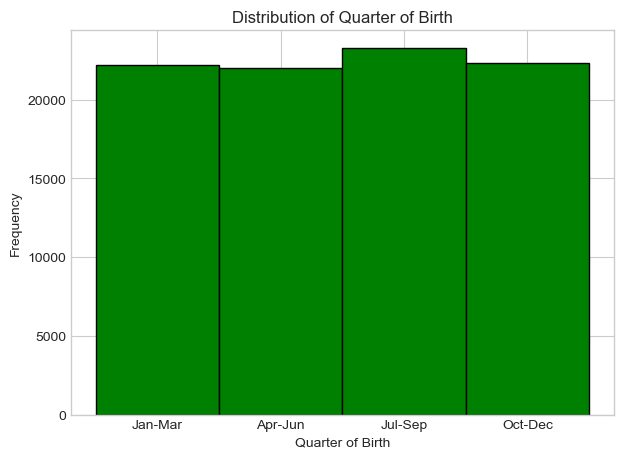

In [17]:
from diffprivlib.mechanisms import GeometricTruncated
mech2 = GeometricTruncated(epsilon=17.14, lower=min(df.QTRBIR), upper=max(df.QTRBIR), random_state=0)
x = df.QTRBIR
plot_birth_quarter(x)
new_qtrbir = [mech2.randomise(x) for x in df.QTRBIR]
plot_birth_quarter(new_qtrbir)

epsilon = 0.01
The differentially private mean age is 42.9 			 whereas the original was 38.3
The differentially private mean quarter of birth is 1.3 	 whereas the original was 1.5


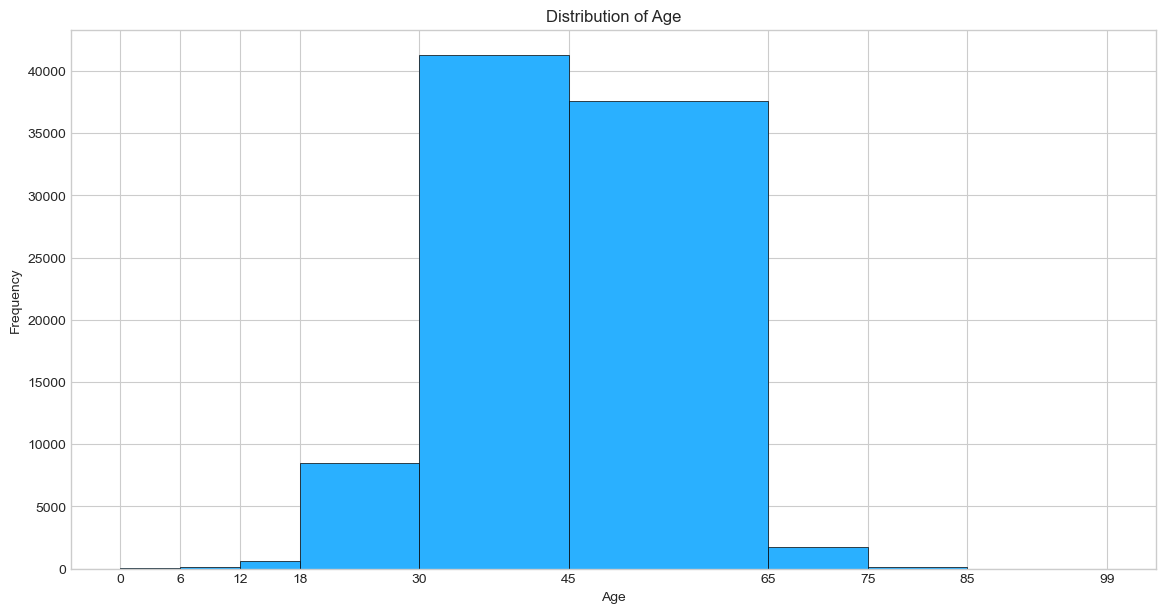

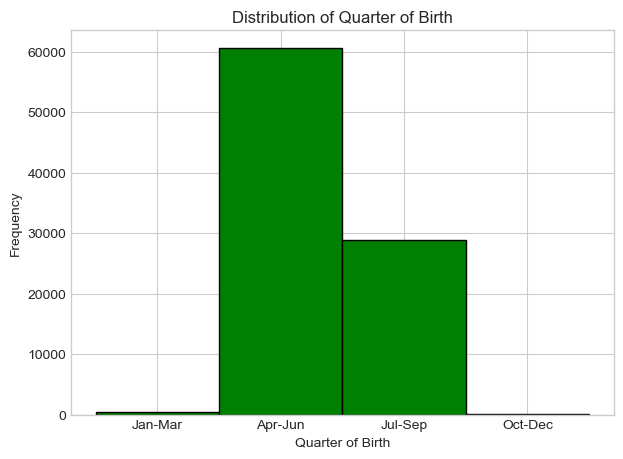


epsilon = 0.1
The differentially private mean age is 47.3 			 whereas the original was 38.3
The differentially private mean quarter of birth is 1.5 	 whereas the original was 1.5


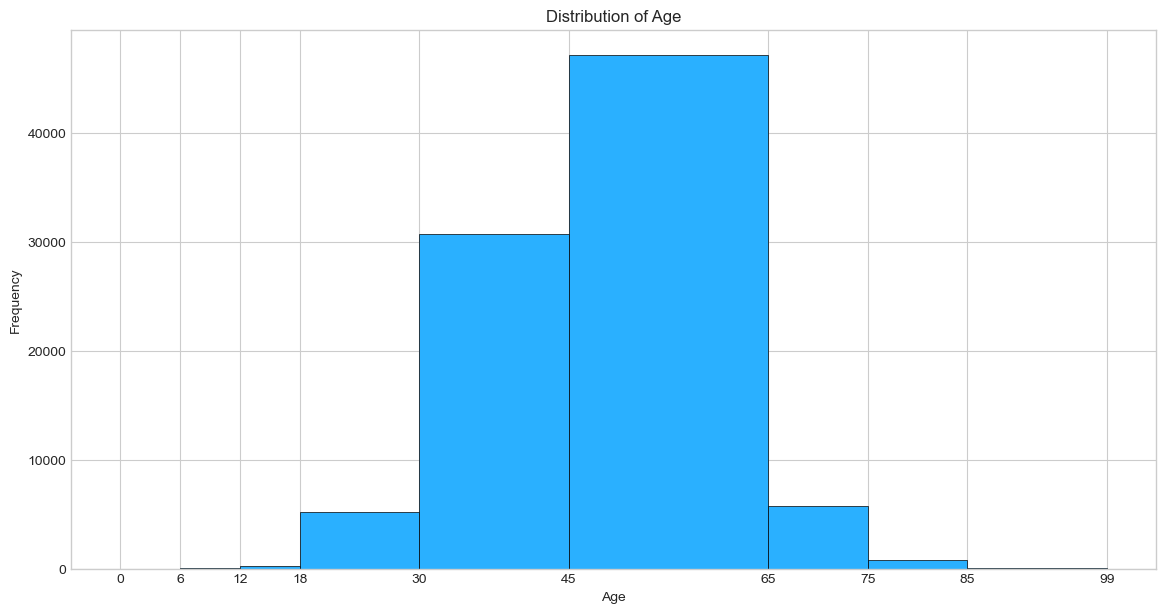

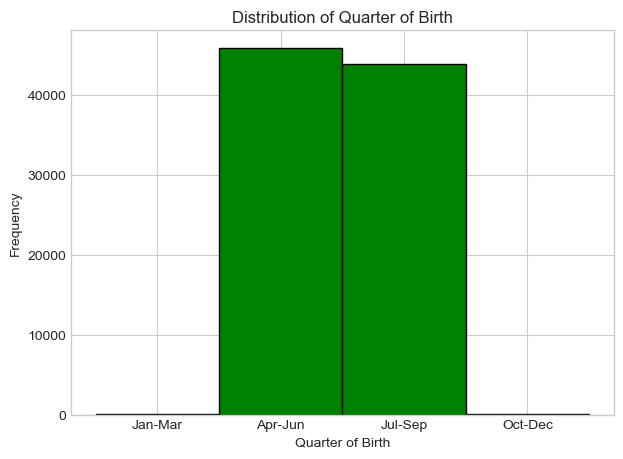


epsilon = 1
The differentially private mean age is 41.1 			 whereas the original was 38.3
The differentially private mean quarter of birth is 1.5 	 whereas the original was 1.5


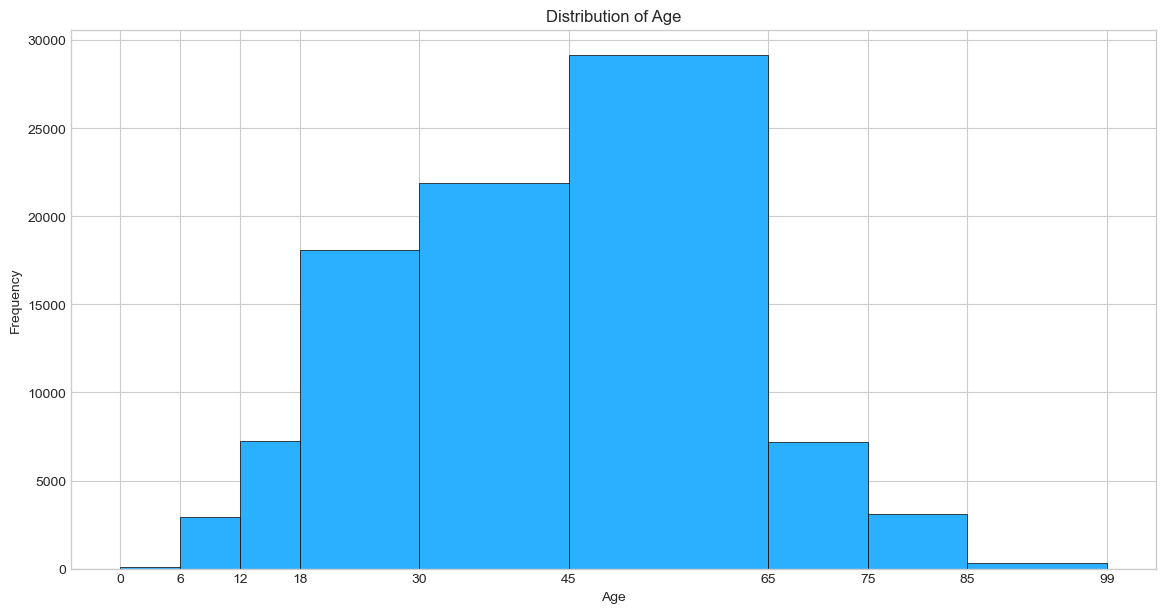

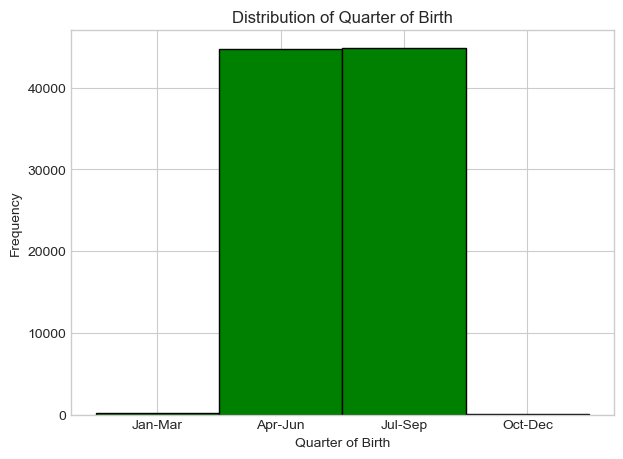


epsilon = 10
The differentially private mean age is 38.5 			 whereas the original was 38.3
The differentially private mean quarter of birth is 1.5 	 whereas the original was 1.5


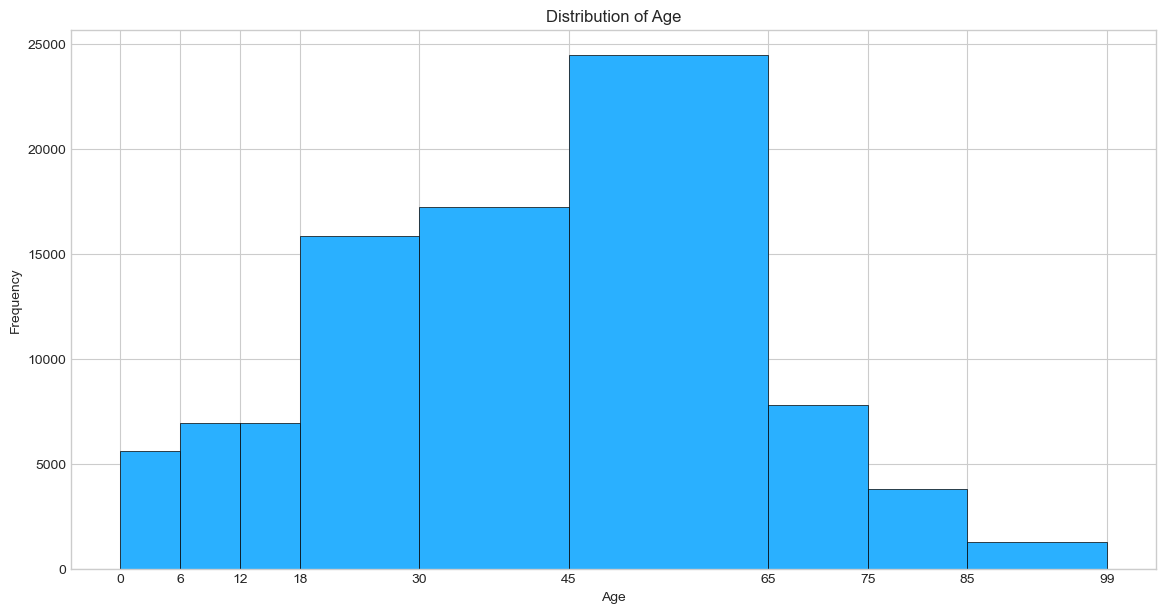

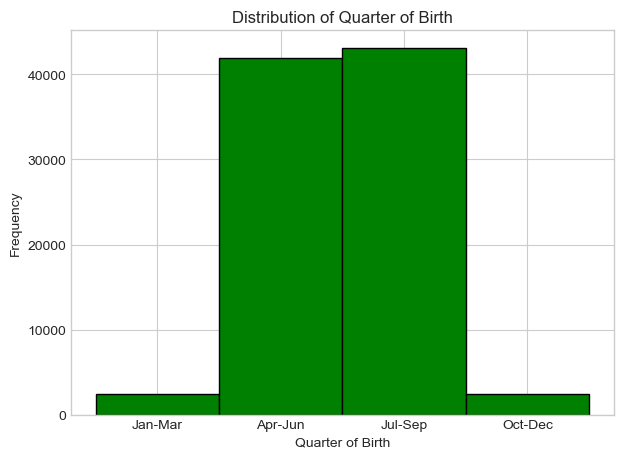


epsilon = 100
The differentially private mean age is 38.3 			 whereas the original was 38.3
The differentially private mean quarter of birth is 1.5 	 whereas the original was 1.5


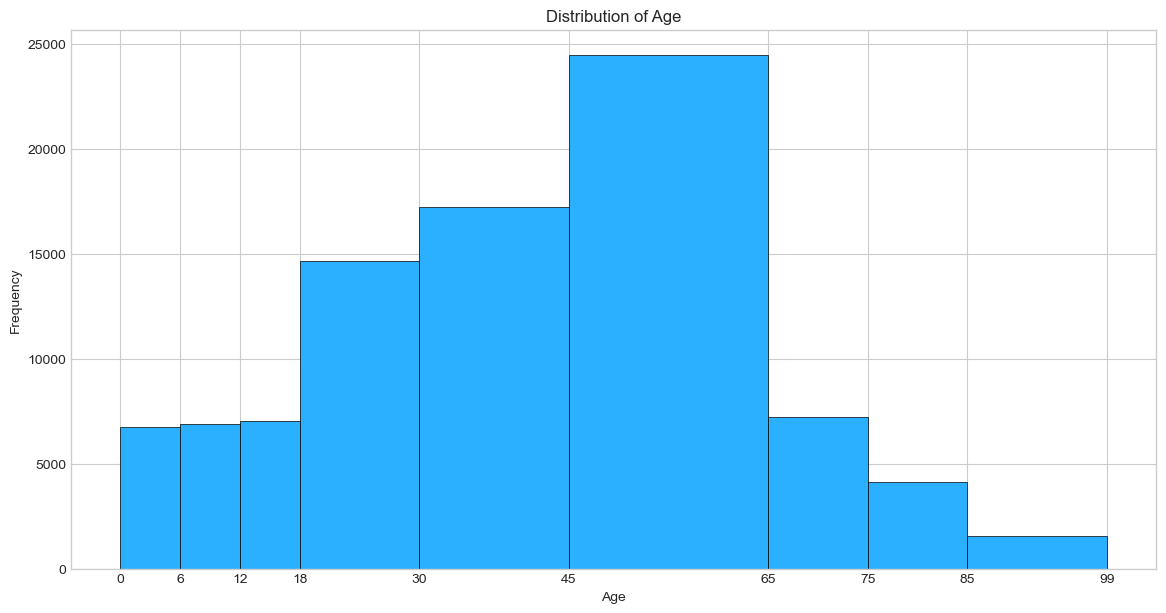

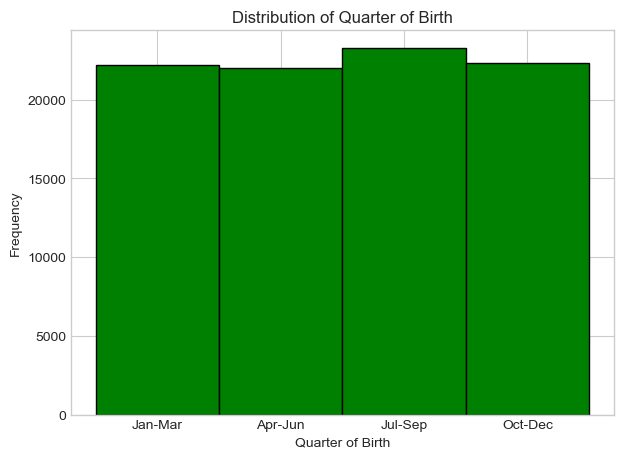

In [18]:
epsilons = [0.01,0.1,1,10,100]
for i in epsilons:
    print("epsilon =", i)
    new_age, new_birth_quarter = apply_gaussian_discrete_on_age_and_birth_quarter(i)
    print_diff_priv_avg(new_age, new_birth_quarter)
    plot_age(new_age)
    plot_birth_quarter(new_birth_quarter)
    print()